In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
import time

In [6]:
# Wiener Process

In [7]:
class WienerProcess:
    
    def __init__(self, mu=0.0,sigma=0.16,delta_t=0.01, period_length = 1.0 , s0=100.0):
        self.mu = mu
        self.sigma = sigma
        self.delta_t = delta_t
        self.period_length = period_length
        self.s0 = s0
    
    def simulate_one_path(self):
        path = np.zeros(shape=int(self.period_length/0.01), dtype=np.float32)
        path[0] = self.s0
        randoms = self.sigma*np.random.normal(size=int(self.period_length/self.delta_t))*np.sqrt(self.delta_t) + self.mu*self.delta_t
        for i in range(1, int(self.period_length/self.delta_t)):
            path[i] = path[i-1] + path[i-1]*randoms[i]
        return path
    
    def simulate_multiple_paths(self, npath=100):
        paths = np.zeros(shape=[npath, int(self.period_length/self.delta_t)])
        for i in range(npath):
            paths[i] = self.simulate_one_path()
        return paths
    def simulate_one_pair(self, corr=0.8):
        path1 = np.zeros(shape=int(self.period_length/0.01), dtype=np.float32)
        path2 = np.zeros(shape=int(self.period_length/0.01), dtype=np.float32)
        path1[0] = self.s0
        path2[0] = self.s0
        epl1 = np.random.normal(size=int(self.period_length/self.delta_t))
        epl2 = corr*epl1 + np.sqrt(1-corr*corr)*np.random.normal(size=int(self.period_length/self.delta_t))
        #print("Correlation is ", np.corrcoef(epl1,epl2))
        randoms1 = self.sigma*epl1*np.sqrt(self.delta_t) + self.mu*self.delta_t
        randoms2 = self.sigma*epl2*np.sqrt(self.delta_t) + self.mu*self.delta_t
        
        for i in range(1, int(self.period_length/self.delta_t)):
            path1[i] = path1[i-1] + path1[i-1]*randoms1[i]
            path2[i] = path2[i-1] + path2[i-1]*randoms2[i]
        return path1, path2, epl1, epl2
    
    def simulate_multiple_pairs(self, npair=100, corr=0.8):
        paths1 = np.zeros(shape=[npair, int(self.period_length/self.delta_t)])
        paths2 = np.zeros(shape=[npair, int(self.period_length/self.delta_t)])
        
        for i in range(npair):
            paths1[i], paths2[i], _, __= self.simulate_one_pair(corr)
            #print("corr ", np.corrcoef(paths1[i], paths2[i]))
        return paths1, paths2

In [8]:
wp = WienerProcess()

In [9]:
paths = wp.simulate_multiple_paths(1000)

In [10]:
paths=paths.reshape([-1,1000])

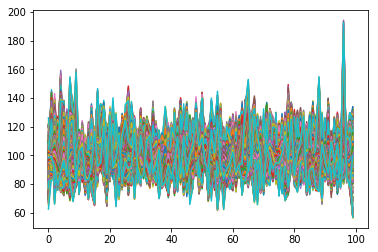

In [11]:
plt.plot(paths)
plt.show()

In [12]:
# Vasicek

In [13]:
class Vasicek:
    
    def __init__(self, start_rate = 0.06, long_rate = 0.03, gamma=1.0, sigma=0.03, delta_t = 0.01, period_length=1.0):
        self.start_rate = start_rate
        self.gamma = gamma
        self.sigma = sigma
        self.delta_t =delta_t
        self.period_length = period_length
        self.long_rate = long_rate
    
    def simulate_one_path(self):
        path = np.zeros(shape=int(self.period_length/0.01), dtype=np.float32)
        path[0] = self.start_rate
        randoms = self.sigma*np.random.normal(size=int(self.period_length/self.delta_t))*np.sqrt(self.delta_t) 
        for i in range(0, int(self.period_length/self.delta_t)):
            path[i] = path[i-1] + self.gamma*(self.long_rate-path[i-1]) + randoms[i]
        return path
    
    def simulate_multiple_paths(self, npath=100):
        paths = np.zeros(shape=[npath, int(self.period_length/self.delta_t)])
        for i in range(npath):
            paths[i] = self.simulate_one_path()
        return paths
        

In [14]:
vs = Vasicek()

In [15]:
paths = vs.simulate_multiple_paths(100)

In [16]:
paths=paths.reshape([-1,100])

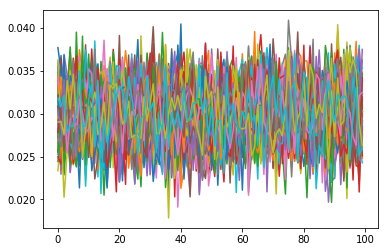

In [17]:
plt.plot(paths)
plt.show()

In [18]:
wp = WienerProcess()

In [19]:
path1, path2, epl1, epl2 = wp.simulate_one_pair()

In [20]:
print("Correlation between random shocks is \n",np.corrcoef(epl1,epl2))

Correlation between random shocks is 
 [[1.         0.80989118]
 [0.80989118 1.        ]]


In [21]:
print("Correlation between stock prices is \n", np.corrcoef(path1,path2))

Correlation between stock prices is 
 [[1.        0.5205193]
 [0.5205193 1.       ]]


In [22]:
paths1, paths2 = wp.simulate_multiple_pairs(100)

In [23]:
np.corrcoef(paths1[0],paths2[0])

array([[1.        , 0.57595164],
       [0.57595164, 1.        ]])

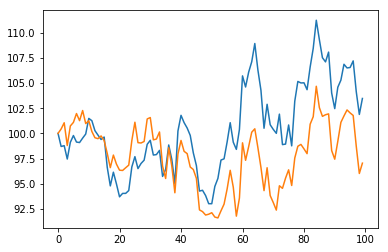

In [24]:
plt.plot(paths1[0])
plt.plot(paths2[0])
plt.show()

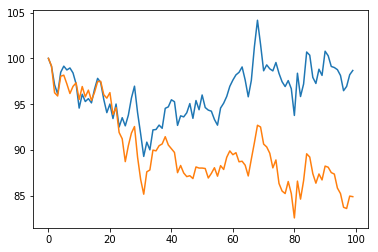

In [25]:
plt.plot(paths1[1])
plt.plot(paths2[1])
plt.show()

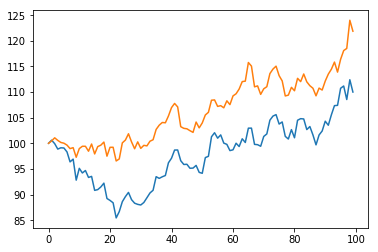

In [26]:
plt.plot(paths1[2])
plt.plot(paths2[2])
plt.show()